# Comprobacion de la transformacion de estados a angulos

In [4]:
from py_lab.utils import PSG_angles_2_states, PSG_states_2_angles, PSA_angles_2_states, PSA_states_2_angles, np, degrees
from py_pol.mueller import Stokes, Mueller
import matplotlib.pyplot as plt

In [2]:
# Variables
angles = np.linspace(0, 179.999*degrees, 181)
az = np.linspace(0, 179.999*degrees, 180, endpoint=False)
el = np.linspace(-45*degrees, 45*degrees, 91)
Angles_1, Angles_2 = np.meshgrid(angles, angles)
Az, El = np.meshgrid(az, el)
Sall = Stokes().general_azimuth_ellipticity(azimuth=Az, ellipticity=El)
Az_flatten = Az.flatten()
El_flatten = El.flatten()

## PSG

### Angulos a estados

In [9]:
# Simular PSG
Sil = Stokes().circular_light()
Mp = Mueller().diattenuator_perfect(azimuth=Angles_1)
Mr = Mueller().quarter_waveplate(azimuth=Angles_2)
Sfin = Mr * Mp * Sil
Az_exp, El_exp = Sfin.parameters.azimuth_ellipticity()

# Angles to states
Az_th, El_th = PSG_angles_2_states(phi_P=Angles_1, phi_Q=Angles_2)

# Error
error_az = np.linalg.norm(Az_exp-Az_th)
error_el = np.linalg.norm(El_exp-El_th)
print("Error en acimut: ", error_az)
print("Error en elipticidad: ", error_el)

# Cuidado, puede dar error si se usa el estado perfectamente circular porque el acimut no esta definido

Error en acimut:  1.898201242790772e-11
Error en elipticidad:  1.6403285719673636e-14


### Estados a angulos

In [14]:
# States to angles
Angles_P_th, Angles_Q_th = PSG_states_2_angles(azimuth=Az, ellipticity=El)

# Simular PSG
Sil = Stokes().circular_light()
Mp = Mueller().diattenuator_perfect(azimuth=Angles_P_th)
Mr = Mueller().quarter_waveplate(azimuth=Angles_Q_th)
Sfin = Mr * Mp * Sil
Az_exp, El_exp = Sfin.parameters.azimuth_ellipticity()

# Error
error_az = Az_exp-Az
error_el = El_exp-El
cond = np.isnan(error_az)
if np.any(cond):
    error_az[cond] = 0
error_az = np.linalg.norm(error_az)
error_el = np.linalg.norm(error_el)
print("Error en acimut: ", error_az)
print("Error en elipticidad: ", error_el)

Error en acimut:  1.357329503508494e-14
Error en elipticidad:  1.4950515186242065e-14


## PSA

### Angles to states

In [12]:
# Simular PSA
Mp = Mueller().diattenuator_perfect(azimuth=Angles_1)
Mr = Mueller().quarter_waveplate(azimuth=Angles_2)
Mpsa = Mp * Mr

# Encontrar el estado analizado
Az_exp = np.zeros_like(Angles_1)
El_exp = np.zeros_like(Angles_1)
for ind1 in range(angles.size):
    for ind2 in range(angles.size):
        Sfin = Mpsa[ind2, ind1] * Sall
        I = Sfin.parameters.intensity()
        indices = np.argmax(I)
        Az_exp[ind2, ind1] = Az_flatten[indices]
        El_exp[ind2, ind1] = El_flatten[indices]

# Angles to states
Az_th, El_th = PSA_angles_2_states(phi_P=Angles_1, phi_Q=Angles_2)

# Error
error_az = np.linalg.norm(Az_exp-Az_th)
error_el = np.linalg.norm(El_exp-El_th)
print("Error en acimut: ", error_az)
print("Error en elipticidad: ", error_el)

# Cuidado, puede dar error si se usa el estado perfectamente circular porque el acimut no esta definido

Error en acimut:  53.51084941018992
Error en elipticidad:  0.001296820176113509


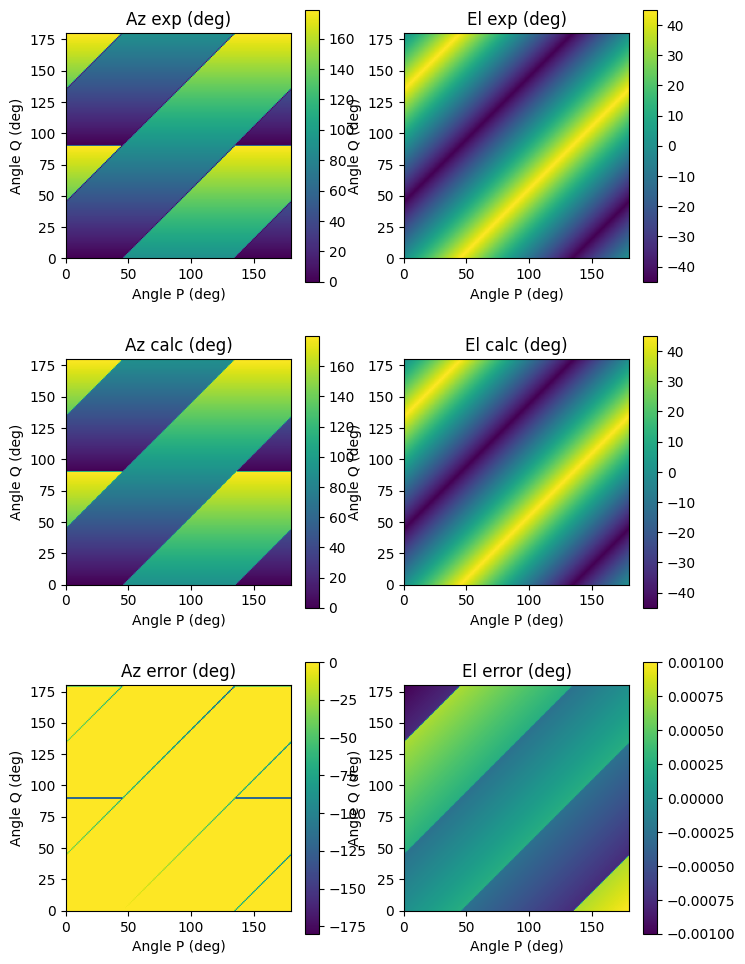

In [14]:
rep = [Az_exp, El_exp,
       Az_th, El_th,
       Az_exp - Az_th, El_exp - El_th]
titles = ["Az exp (deg)", "El exp (deg)", "Az calc (deg)", "El calc (deg)", "Az error (deg)", "El error (deg)"]

plt.figure(figsize=(8,12))
for ind in range(len(rep)):
    plt.subplot(3,2,ind+1)
    plt.imshow(rep[ind]/degrees, origin="lower", extent=[0, 180, 0, 180])
    plt.title(titles[ind])
    plt.colorbar()
    plt.xlabel("Angle P (deg)")
    plt.ylabel("Angle Q (deg)")


### States to angles

In [15]:
# States to angles
Angles_P_th, Angles_Q_th = PSA_states_2_angles(azimuth=Az, ellipticity=El)

# Simular PSA
Mp = Mueller().diattenuator_perfect(azimuth=Angles_P_th)
Mr = Mueller().quarter_waveplate(azimuth=Angles_Q_th)
Mpsa = Mp * Mr

# Encontrar el estado analizado
Az_exp = np.zeros_like(Angles_Q_th)
El_exp = np.zeros_like(Angles_Q_th)
for ind1 in range(az.size):
    for ind2 in range(el.size):
        Sfin = Mpsa[ind2, ind1] * Sall
        I = Sfin.parameters.intensity()
        indices = np.argmax(I)
        Az_exp[ind2, ind1] = Az_flatten[indices]
        El_exp[ind2, ind1] = El_flatten[indices]

# Error
error_az = Az_exp-Az
error_el = El_exp-El
cond = np.isnan(error_az)
if np.any(cond):
    error_az[cond] = 0
error_az = np.linalg.norm(error_az)
error_el = np.linalg.norm(error_el)
print("Error en acimut: ", error_az)
print("Error en elipticidad: ", error_el)

Error en acimut:  34.27080610078684
Error en elipticidad:  0.0


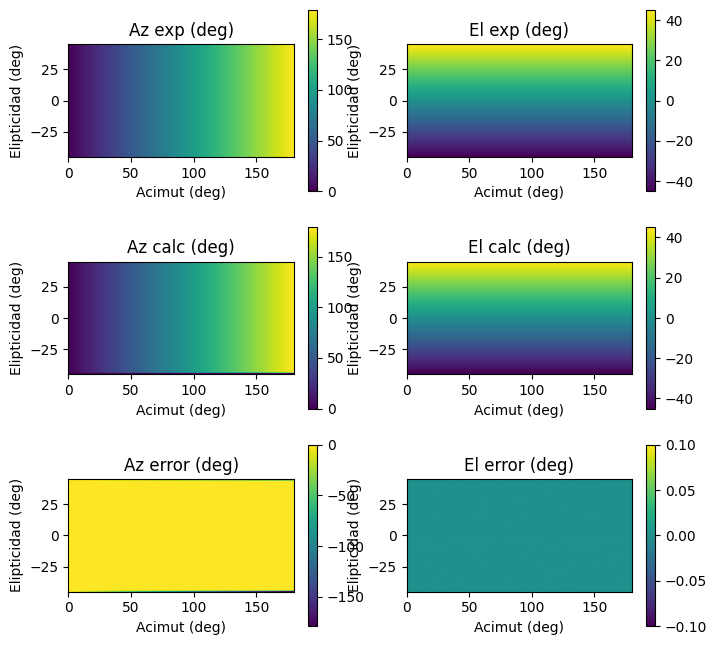

In [18]:
rep = [Az, El,
       Az_exp, El_exp,
       Az_exp - Az, El_exp - El]
titles = ["Az exp (deg)", "El exp (deg)", "Az calc (deg)", "El calc (deg)", "Az error (deg)", "El error (deg)"]

plt.figure(figsize=(8,8))
for ind in range(len(rep)):
    plt.subplot(3,2,ind+1)
    plt.imshow(rep[ind]/degrees, origin="lower", extent=[0, 180, -45, 45])
    plt.title(titles[ind])
    plt.colorbar()
    plt.xlabel("Acimut (deg)")
    plt.ylabel("Elipticidad (deg)")